In [1]:
%matplotlib inline
import sys
import os
import matplotlib.pyplot as plt
working_dir_path = os.getcwd()
genomagic_qa_repo_path = '/'.join(working_dir_path.split('/')[:-1])
sys.path.append(genomagic_qa_repo_path)
import redshift.basic_queries as rs
import redshift.advanced_queries as aq
bp_units = 1000000
#change this parameters
host='rndlab-genomagic-redshift.cl6ox83ermwm.us-east-1.redshift.amazonaws.com'
data_version='maize_benchmark_test_fix_mkrs_919_01'
#data_version='public_soy_v2_03'

### No. of samples per type (ARG/WGS/GBS/SNP)

In [2]:
print(rs.get_samples_type_info_as_string(host, data_version))



whole_genome_sequencing samples count = 40
applied_reference_genome samples count = 11


### No. of HM, No of mapped mapped  HM

In [3]:
[total_haps, unmapped_haps] = rs.get_hap_count_total_hap_markers_as_string(host, data_version)
print('There are {:.2f}M total haplotypes, {:.2f}M are unmapped'.format(total_haps/bp_units, unmapped_haps/bp_units))

There are 31.35M total haplotypes, 10.86M are unmapped


### HMs in samples

In [4]:
[total_haps, unmapped_haps] = rs.get_hap_samples_total_as_string(host, data_version)
print('There are {:.2f}M total haplotypes X samples , {:.2f}M are unmapped'.format(total_haps/bp_units, unmapped_haps/bp_units))


There are 232.47M total haplotypes X samples , 79.96M are unmapped


### arg wgs samples data

In [5]:
haps_count_out_name = '{}/{}_haps_per_sample.csv'.format(os.getcwd(), data_version)
haps_freq_out_name = '{}/{}_haps_per_sample.csv'.format(os.getcwd(), data_version)
rs.write_samples_haps_count_to_file(host, data_version, haps_count_out_name)
df = rs.write_samples_haps_freq_to_file(host, data_version, haps_freq_out_name)

saved arg_wgs_full_haps_count to /home/ariel/clients/genomagic_qa/html_report/maize_benchmark_test_fix_mkrs_919_01_haps_per_sample.csv
saved arg_wgs_full_haps_count to /home/ariel/clients/genomagic_qa/html_report/maize_benchmark_test_fix_mkrs_919_01_haps_per_sample.csv


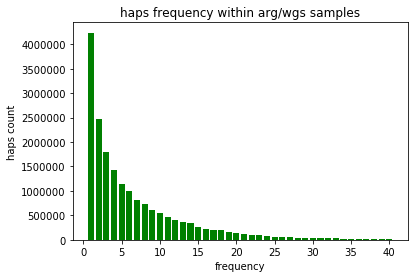

In [6]:
df = aq.get_freq(host, data_version)
plt.bar(df['freq'], df['count'], color='green')
plt.xlabel("frequency")
plt.ylabel("haps count")
plt.title("haps frequency within arg/wgs samples")
plt.show()